In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_51980_I')

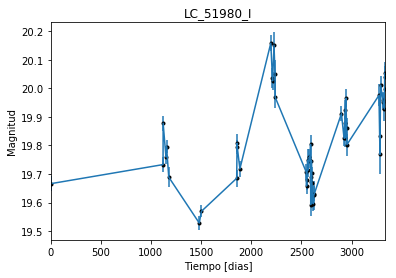

In [2]:
data = np.genfromtxt('LC_51980_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_51980_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

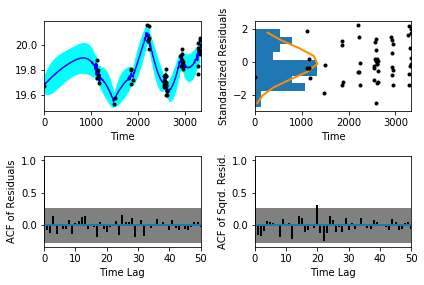

In [5]:
sample.assess_fit()

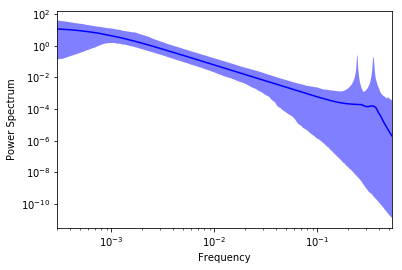

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_51980_I')

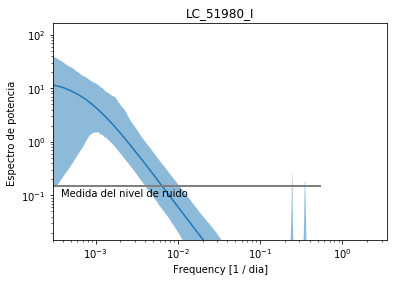

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_51980_I')

Text(0.5,1,'Prediccion , valor esperado LC_51980_I')

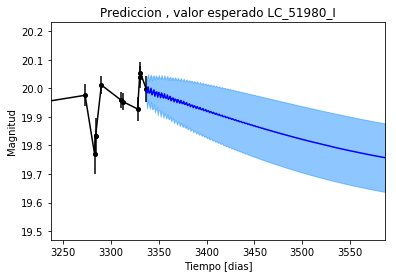

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_51980_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_51980_I')

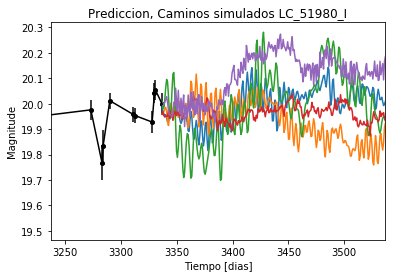

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_51980_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_51980_I')

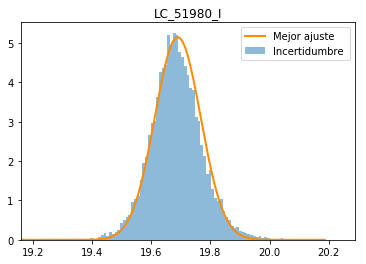

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_51980_I')

Text(0.5,1,'Interpolacion, camino simulado LC_51980_I')

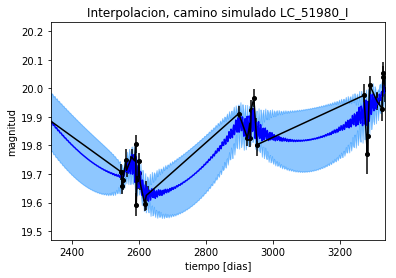

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51980_I')

Text(0.5,1,'Interpolacion, camino simulado LC_51980_I')

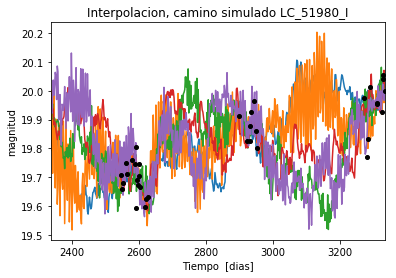

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51980_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 613.130819853
Median: 0.00362397934521
Standard deviation: 0.113224686439
68% credibility interval: [ 0.00083041  0.01941714]
95% credibility interval: [ 0.00037928  0.36280629]
99% credibility interval: [  3.32218443e-04   8.68592423e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 385.218880795
Median: 0.00343846506023
Standard deviation: 0.0717021825507
68% credibility interval: [ 0.0007957   0.01679673]
95% credibility interval: [ 0.00037053  0.18926106]
99% credibility interval: [  3.31949886e-04   5.47058330e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1216.94577516
Median: 0.185633248357
Standard deviation:

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 193.898522129
Median: 77.041775995
Standard deviation: 2.90798955231
68% credibility interval: [ 73.48610181  79.66326053]
95% credibility interval: [ 70.69140346  81.02360233]
99% credibility interval: [ 68.62946502  81.60332041]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 317.221434161
Median: 1.33720477912
Standard deviation: 2.1914615965
68% credibility interval: [ 0.217793   4.5602767]
95% credibility interval: [ 0.01868373  6.99555147]
99% credibility interval: [  0.01297819  10.2762155 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 277.640857955
Median: 4.91232797564
Standard deviation: 8.68214017416
68% credibility interval: [  2.37781044  14.40233934]
95% credibility interval: [  0.20661922  32

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 97.0491887336
Median: 7.19264084208e-57
Standard deviation: 1.62685472266e+76
68% credibility interval: [  2.60173392e-112   2.24498812e+026]
95% credibility interval: [  3.79062692e-155   6.75820082e+075]
99% credibility interval: [  4.89062814e-161   1.00996866e+077]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 766.805087706
Median: 19.7938191306
Standard deviation: 0.0817390400628
68% credibility interval: [ 19.71798774  19.86303614]
95% credibility interval: [ 19.62872564  19.96475513]
99% credibility interval: [ 19.5648158   20.03631905]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 746.884188983
Median: 0.350428835011
Standard deviation: 0.189774610109
68% credibility interval: [ 0.2407985   0.53509023]
95% credibility interval: [ 0.          0.83552544]
99% credibility interval: [ 0.          1.02658568]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 746.884188983
Median: 0.350428835011
Standard deviation: 0.189774610109
68% credibility interval: [ 0.2407985   0.53509023]
95% credibility interval: [ 0.          0.83552544]
99% credibility interval: [ 0.          1.02658568]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 157.135954855
Median: 0.0
Standard deviation: 0.000398334123907
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 193.898522129
Median: 77.041775995
Standard deviation: 2.90798955231
68% credibility interval: [ 73.48610181  79.66326053]
95% credibility interval: [ 70.69140346  81.02360233]
99% credibility interval: [ 68.62946502  81.60332041]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 346.252449677
Median: 0.0323788711889
Standard deviation: 0.019676176759
68% credibility interval: [ 0.0205278   0.05165519]
95% credibility interval: [ 0.01357087  0.08025053]
99% credibility interval: [ 0.01054946  0.1202648 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 449.35905808
Median: 1.20190024367
Standard deviation: 0.290423142076
68% credibility interval: [ 0.95705631  1.55969046]
95% credibility interval: [ 0.79372162  1.89808159]
99% credibility interval: [ 0.70428871  1.97944437]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 225.636555161
Median: 0.0680589888767
Standard deviation: 0.490037444672
68% credibility interval: [  2.50437955e-28   3.71578559e-01]
95% credibility interval: [  1.22933057e-77   1.65543886e+00]
99% credibility interval: [  8.84477493e-79   2.94516752e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 613.130819853
Median: (-0.0227701337753-1.54121518987j)
Standard deviation: 1.38848774377
68% credibility interval: [-0.12200148-3.97167899j -0.00521760-2.76586214j]
95% credibility interval: [-2.27957915+0.j         -0.00238308-2.20975539j]
99% credibility interval: [ -5.45752715e+00+0.j          -2.08739004e-03-2.22775822j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 385.218880795
Median: (-0.0216045131457+0.91818219369j)
Standard deviation: 1.27466002746
68% credibility interval: [-0.10553698+1.54066658j -0.00499951+1.56236648j]
95% credibility interval: [-1.18916232+6.40611784j -0.00232810+2.20999602j]
99% credibility interval: [ -3.43726886e+00+6.22286231j  -2.08570265e-03+0.17714305j]
Posterior summary for pa